In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D4-Allyson/S1/Office_Allyson-S1.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:1440]
test_data = df.iloc[1440:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (1416, 24, 1)
y_train.shape =  (1416,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [11]:
import tensorflow as tf
import sklearn.preprocessing
from keras.layers import Dense,Dropout,LSTM,Bidirectional
from keras.models import Sequential

In [12]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(24, activation='tanh', return_sequences=False), input_shape=(24,1)))
#model.add(Bidirectional(LSTM(24, activation='tanh')))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 48)               4992      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 49        
                                                                 
Total params: 5,041
Trainable params: 5,041
Non-trainable params: 0
_________________________________________________________________


In [25]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss="MSE")

In [26]:
history= model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
12/12 [==============================] - 4s 20ms/step - loss: 10.3793
Epoch 2/300
12/12 [==============================] - 0s 19ms/step - loss: 10.1718
Epoch 3/300
12/12 [==============================] - 0s 19ms/step - loss: 10.0999
Epoch 4/300
12/12 [==============================] - 0s 20ms/step - loss: 10.0872
Epoch 5/300
12/12 [==============================] - 0s 19ms/step - loss: 10.0844
Epoch 6/300
12/12 [==============================] - 0s 18ms/step - loss: 10.0440
Epoch 7/300
12/12 [==============================] - 0s 18ms/step - loss: 10.0187
Epoch 8/300
12/12 [==============================] - 0s 19ms/step - loss: 10.0119
Epoch 9/300
12/12 [==============================] - 0s 21ms/step - loss: 9.9973
Epoch 10/300
12/12 [==============================] - 0s 19ms/step - loss: 9.9829
Epoch 11/300
12/12 [==============================] - 0s 21ms/step - loss: 9.9745
Epoch 12/300
12/12 [==============================] - 0s 19ms/step - loss: 9.9667
Epoch 13/300
12/1

In [27]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [29]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))
mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)
mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

print('RMSE for BiLSTM Model for training is:',rmse_train)
print('RMSE for BiLSTM Model for testing is:',rmse_test)
print('MAE for BiLSTM Model for training is:',mae_train)
print('MAE for BiLSTM Model for testing is:',mae_test)
print('MAPE for BiLSTM Model for training is:',mape_train)
print('MAPE for BiLSTM Model for testing is:',mape_test)

RMSE for BiLSTM Model for training is: 2.9808007576207847
RMSE for BiLSTM Model for testing is: 2.1881642085417363
MAE for BiLSTM Model for training is: 1.5438429908967963
MAE for BiLSTM Model for testing is: 1.5132711920244941
MAPE for BiLSTM Model for training is: 0.07234847607166471
MAPE for BiLSTM Model for testing is: 0.07030792789569394


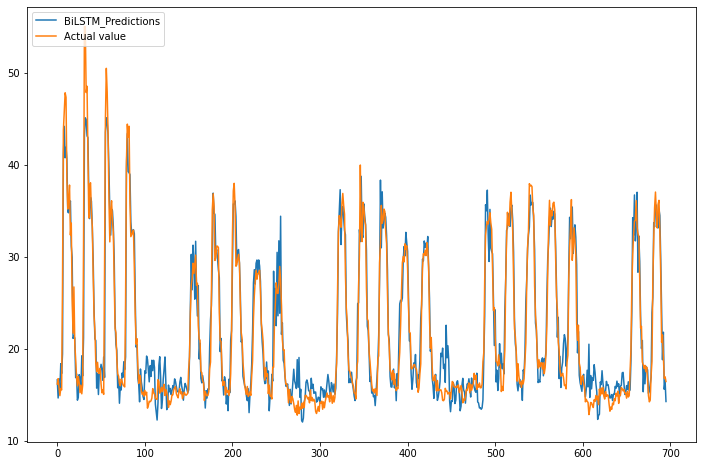

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='BiLSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [19]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([16.15]), array([16.610767], dtype=float32))

In [20]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-0.46076736]), array([2.10182404]), array([-0.83364571]), array([-0.70093952]), array([-2.69733055]), array([-1.77377365]), array([7.61385826]), array([2.68515518]), array([1.56123352]), array([7.07283768]), array([5.42902527]), array([-2.27598251]), array([0.3273558]), array([1.56744919]), array([2.44148331]), array([-3.70616425]), array([2.51408356]), array([-4.55903923]), array([0.56987518]), array([5.36959908]), array([-0.60233063]), array([2.0452713]), array([-0.3263765]), array([1.56254955]), array([2.26961277]), array([-0.83541885]), array([-1.57351044]), array([0.44176891]), array([-4.13145844]), array([-0.98976608]), array([10.17643082]), array([11.86740997]), array([9.90314438]), array([2.93275558]), array([5.39345245]), array([-1.81335983]), array([-2.85725311]), array([3.67195923]), array([1.58672409]), array([-1.2587709]), array([0.06786804]), array([-1.66912933]), array([-0.70679657]), array([0.81590546]), array([-2.44290215]), array([1.78812599]), array([1.218944

In [21]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([12.0309967]), array([-10.4487262]))

In [22]:
max(d1)-min(d1)

array([22.4797229])

In [23]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [24]:
len(neg),len(pos)

(392, 304)